## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

I didn't have time to provide markdown cells i apologize I was trying to clear up my lines of code 

In [2]:
import pandas as pd
import csv
import sqlite3
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.datasets import load_iris
import seaborn as sns
%matplotlib inline

The code below utilized to clean up the data of th data frame so we can operate with it. 
removing all access symbols utilizing a regular expression and changing data types for math operations. 
No Null Values 

In [3]:
#utilizing this data set to come up with foreign gross and production_budget 
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col = False,)
#code was used due to not being able manipulate data within columns correctly as integrs. 
movie_budget['production_budget']= movie_budget['production_budget'].str.replace(r'\W','',)
movie_budget['worldwide_gross']= movie_budget['worldwide_gross'].str.replace(r'\W','',)
movie_budget['domestic_gross']= movie_budget['domestic_gross'].str.replace(r'\W','',)
#Code Usd to transform the datatype from object to integer
movie_budget['production_budget']= movie_budget['production_budget'].astype(int)
#World_wide Gross/domestic__gross into a float
movie_budget['domestic_gross']= movie_budget['domestic_gross'].astype(float)
movie_budget['fworldwide_gross']= movie_budget['worldwide_gross'].astype(float)
#Dropped the previous worldwide_gross as it was an object
movie_budget.drop(columns = ['worldwide_gross'], inplace = True)
#top 50 movies with the highest production budget
movie_budget

<ipython-input-3-c50220ad0112>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_budget['production_budget']= movie_budget['production_budget'].str.replace(r'\W','',)
<ipython-input-3-c50220ad0112>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_budget['worldwide_gross']= movie_budget['worldwide_gross'].str.replace(r'\W','',)
<ipython-input-3-c50220ad0112>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_budget['domestic_gross']= movie_budget['domestic_gross'].str.replace(r'\W','',)


,id,release_date,movie,production_budget,domestic_gross,fworldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0.0,0.000000e+00


In [4]:
#Created a new column labeled foreign_gross by subtracted the world wide gross and the domestic gross


movie_budget['foreign_gross'] = movie_budget['fworldwide_gross'] - movie_budget['domestic_gross']
for_gross = movie_budget.sort_values(['foreign_gross'], ascending = False).head(25)

In [5]:
#Top Domestic gorssing movies movies
dom_gross = movie_budget.sort_values(['domestic_gross'], ascending = False).head()

In [6]:
#top 25 production costs 
product_budget = movie_budget.sort_values(['production_budget'], ascending = False).head(25)

In [7]:
#is there a correltion between production budget and the amount a movie can make domestically and foreign? 
#1 Domestic correlation there are only 6 values who are of the highest production value and the highest domestic value

product_budget['movie'].isin(dom_gross['movie']).sum()



3

In [8]:
#is there a correltion between production budget and the amount a movie can make domestically and foreign? 
#foreign correlation there are only 8 values who are of the highest production value and the highest foreign gross

In [9]:
#what about if you were one of the top 
#earning domestic films do you automatically become the highest grossing foreign film? 

dom_gross['movie'].isin(for_gross['movie']).sum()

4

In [10]:
#A new column was added to the data fram which added all of the gross income and subtracted the production budget to get the actual total income
movie_budget['actual_income'] = movie_budget['domestic_gross'] + movie_budget['fworldwide_gross'] - movie_budget['production_budget']

In [11]:
actual_income = movie_budget.sort_values(['actual_income'], ascending = False).head(25)

TOP GENRES BY YEAR !

In [14]:
#RECCOMENDED


#had to clean up the data point 'Start_Year'as some of the start years have not been reached yet
genre_2= pd.read_csv('zippedData/imdb.title.basics.csv.gz')

#Top Ten Genres over the last 11 plus Years

genre_2.dropna(inplace = True)
#found out which year had the most run time minutes as to lower the data amount and increase the intensity of the data 
grouped_up = genre_2.groupby(['start_year']).sum()







two_10 = grouped_up.get_group(2010)
top_10_generes_2010 = two_10['genres'].value_counts().head(10)
### Seperating Yearly top genre code
two_11 = grouped_up.get_group(2011)
top_10_generes_2011 = two_11['genres'].value_counts().head(10)
### Seperating Yearly top genre code
two_12 = grouped_up.get_group(2012)
top_10_generes_2012 = two_12['genres'].value_counts().head(10)
### Seperating Yearly top genre code
two_13 = grouped_up.get_group(2013)
top_10_generes_2013 = two_13['genres'].value_counts().head(10)
### Seperating Yearly top genre code#
two_14 = grouped_up.get_group(2014)
top_10_generes_2014 = two_14['genres'].value_counts().head(10)

two_15 = grouped_up.get_group(2015)
top_10_generes_2015 = two_15['genres'].value_counts().head(10)

two_16 = grouped_up.get_group(2016)
top_10_generes_2016 = two_16['genres'].value_counts().head(10)

two_17 = grouped_up.get_group(2017)
top_10_generes_2017 = two_17['genres'].value_counts().head(10)

two_18 = grouped_up.get_group(2018)
top_10_generes_2018 = two_18['genres'].value_counts().head(10)

two_19 = grouped_up.get_group(2019)
top_10_generes_2019 = two_19['genres'].value_counts().head(10)

two_20 = grouped_up.get_group(2020)
top_10_generes_2020 = two_20['genres'].value_counts().head(10)

two_21 = grouped_up.get_group(2021)
top_10_generes_2021 = two_21['genres'].value_counts().head(10)

#following code is for movie ratings
data cleaning consisted of 

In [15]:
movie_rate3 = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col = 0)
#data came with an additional column 

In [16]:
#want to incude only movies with a solid voter count as some movies had a voter count of 1 and that was there rating.
#average voter count was 194 so anything less than 150 we do not want to include in our dataset
movie_rate3['vote_count'].mean()
movie_rate3.drop(movie_rate3[movie_rate3['vote_count'] <= 151].index, inplace = True)
movie_rate3

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
24454,"[27, 53]",416160,en,The Vault,6.945,2017-09-01,The Vault,4.7,187
24462,"[28, 16, 14, 12, 35, 878]",503314,ja,ドラゴンボール超スーパー ブロリー,6.868,2019-01-16,Dragon Ball Super: Broly,7.4,721
24469,"[18, 10749, 35]",416186,fr,Le Redoutable,6.823,2018-04-20,Godard Mon Amour,6.8,160
24472,[35],531949,en,Father of the Year,6.794,2018-07-20,Father of the Year,5.3,235


In [ ]:
#When the most popular movies are rating and what time period it is on average


In [ ]:
#Displays Movies with a greater rating than the average 6.4 movie_rate3['vote_average'].sort_values(ascending = False).head(100)

In [ ]:
#The Below Graph demonstrates no exact correltion between the highest rated movig

Text(0.5, 1.0, 'Highest Production Budget')

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


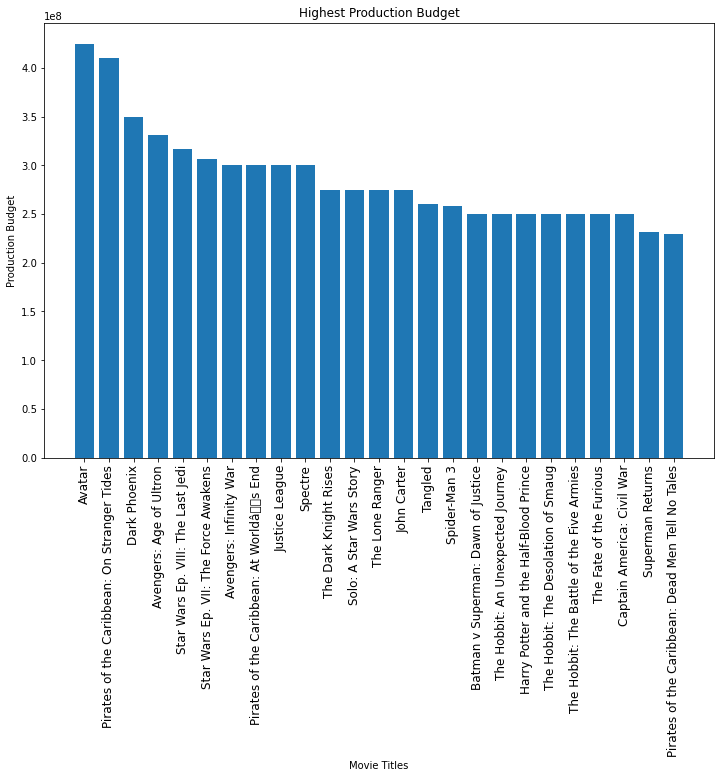

In [17]:
fig, ax, = plt.subplots(figsize = (12, 8))
ax.bar(product_budget['movie'], product_budget['production_budget'])

ax.tick_params('x', rotation = 90, labelsize = 'large')
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Production Budget')
ax.set_title('Highest Production Budget')



Text(0.5, 1.0, 'Top_Foreign_Gross')

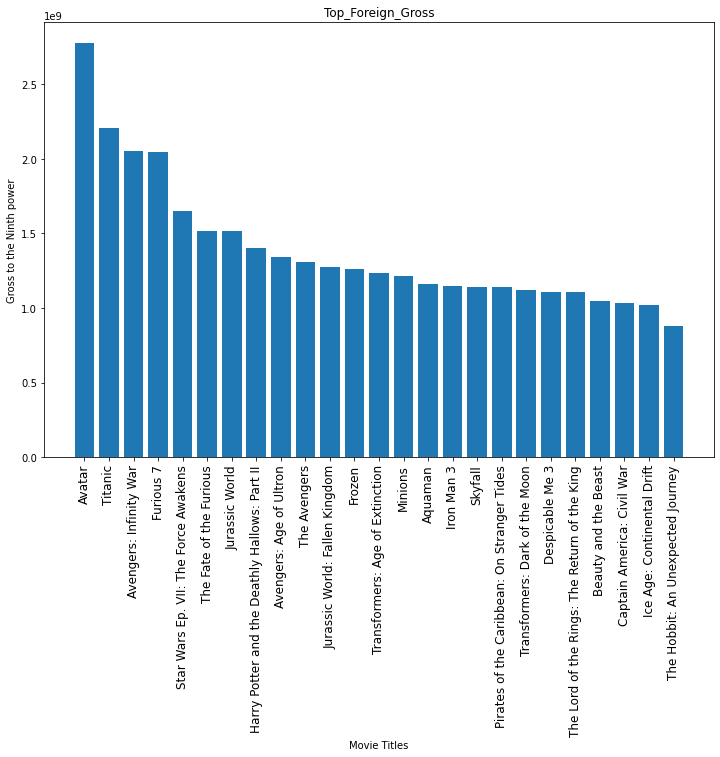

In [18]:

fig, ax, = plt.subplots(figsize = (12, 8))
ax.bar(for_gross['movie'], for_gross['fworldwide_gross'].sort_values(ascending = False))

ax.tick_params('x', rotation = 90, labelsize = 'large')
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Gross to the Ninth power')
ax.set_title('Top_Foreign_Gross')

Text(0.5, 1.0, 'Highest Overall Grossing Movies')

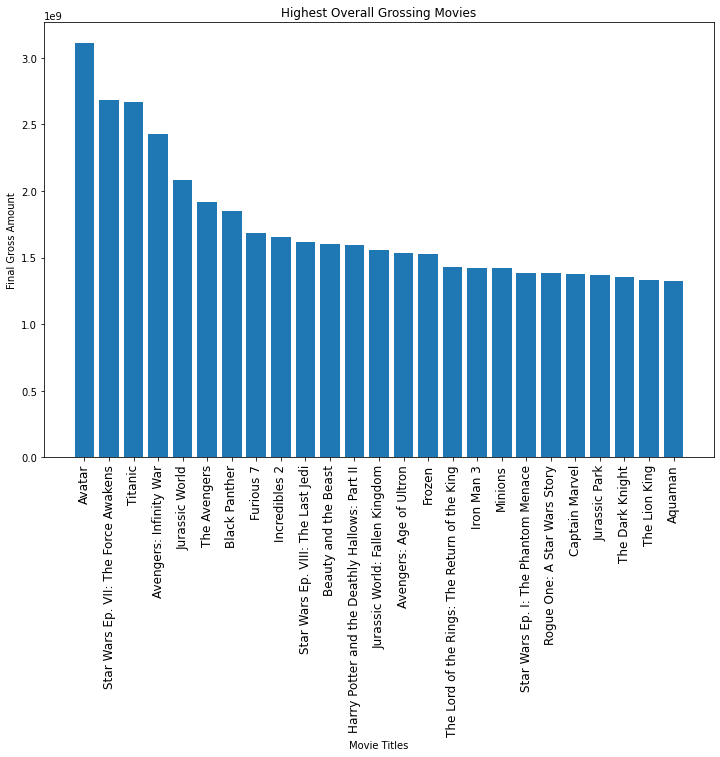

In [19]:
fig, ax, = plt.subplots(figsize = (12, 8))
ax.bar(actual_income['movie'], actual_income['actual_income'])

ax.tick_params('x', rotation = 90, labelsize = 'large')
ax.set_xlabel('Movie Titles')
ax.set_ylabel('Final Gross Amount')
ax.set_title('Highest Overall Grossing Movies')



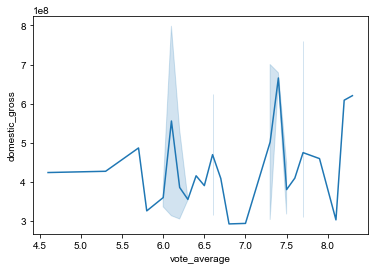

In [20]:
sns.lineplot(x =movie_rate3['vote_average'].head(100), y=movie_budget['domestic_gross'].sort_values(ascending= False).head(100))
sns.set_style('darkgrid')

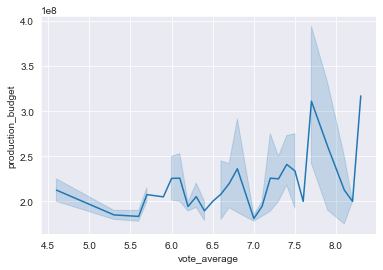

In [21]:
#Shows positive correlation between voters and the producction of the movie 

sns.lineplot(x =movie_rate3['vote_average'].head(100), y =movie_budget['production_budget'].sort_values(ascending= False).head(100))
sns.set_style('darkgrid')



In [22]:
movie_rate3.sort_values(['popularity'], ascending = False)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
...,...,...,...,...,...,...,...,...,...
10254,"[12, 18]",203819,en,Tracks,0.600,2014-09-19,Tracks,7.1,273
10414,[35],116741,en,The Internship,0.600,2013-06-07,The Internship,6.2,2631
10552,[35],182219,fr,Les Profs,0.600,2013-05-05,Serial Teachers,5.6,790
10797,[35],225703,en,The Starving Games,0.600,2013-11-08,The Starving Games,4.2,360


In [23]:
movie_rate3['vote_average'] >=6.4

0         True
1         True
2         True
3         True
4         True
         ...  
24454    False
24462     True
24469     True
24472    False
24546     True
Name: vote_average, Length: 3037, dtype: bool